In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [148]:
f1 = "/Users/yusuke/program/LiteBIRD_sim/beam_study/beam_data/calc_fwhm_dist/m125_p20_red/m125_p20_40.0G_000deg_tp_fwhm.npz"
f2 = "/Users/yusuke/program/LiteBIRD_sim/beam_study/beam_data/calc_fwhm_dist/m125_p20_red/m125_p20_60.0G_000deg_tp_fwhm.npz"
f3 = "/Users/yusuke/program/LiteBIRD_sim/beam_study/beam_data/calc_fwhm_dist/m125_p20_red/m125_p20_78.0G_000deg_tp_fwhm.npz"
fn1 = f1.split('/')[-1]
fn2 = f2.split('/')[-1]
fn3 = f3.split('/')[-1]
freq1 = fn1.split('_')[2]+"Hz"
freq2 = fn2.split('_')[2]+"Hz"
freq3 = fn3.split('_')[2]+"Hz"
#Freq1 = int(fn1.split('_')[2].split(".")[0])
#Freq2 = int(fn2.split('_')[2].split(".")[0])
#Freq3 = int(fn3.split('_')[2].split(".")[0])

df = pd.read_csv("/Users/yusuke/program/LiteBIRD_sim/beam_study/Combined.csv")
df
det_position = fn1.split('_')[0] + "_" + fn1.split('_')[1]
df

,Telescope,Band ID,Center Frequency [GHz],Frequency Band [GHz] (Frac.),Beam size [arcmin],Detector pixel size [mm],Total Number of Bolo.,NET_array [uKrts],Sensitivity [uK arcmin]
0,LFT,1,40,12 (0.30),70.5,32,48,18.50,37.42
1,LFT,2,50,15 (0.30),58.5,32,24,16.54,33.46
2,LFT,3,60,14 (0.23),51.1,32,48,10.54,21.31
3,LFT/LFT,4,68,16 (0.23),"(41.6, 47.1)","(16, 32)","(144, 24)",8.34,16.87
4,LFT/LFT,5,78,18 (0.23),"(36.9, 43.8)","(16, 32)","(144, 48)",5.97,12.07
5,LFT/LFT,6,89,20 (0.23),"(33.0, 41.5)","(16, 32)","(144, 24)",5.58,11.30
6,LFT/MFT,7,100,23 (0.23),"(30.2 , 37.8)","(16, 11.6)","(144, 366)",3.24,6.56
7,LFT/MFT,8,119,36 (0.30),"(26.3 , 33.6)","(16, 11.6)","(144, 488)",2.26,4.58
8,LFT/MFT,9,140,42 (0.30),"(23.7 , 30.8)","(16, 11.6)","(144, 366)",2.37,4.79
9,MFT,10,166,50 (0.30),28.9,11.6,488,2.75,5.57


In [149]:
data1 = np.load(f1)["data"]
data2 = np.load(f2)["data"]
data3 = np.load(f3)["data"]

72.29051981294354
-0.0253974441552276
51.09625552360834
7.32774244943668e-05
43.84536097392214
-0.0010356386740215662


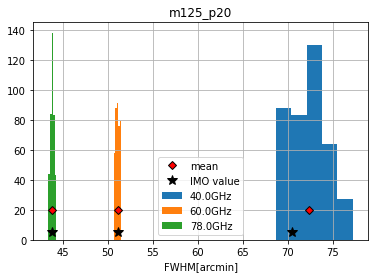

In [150]:
bins = 5

fwhm1 = 70.5#float(df["Beam size [arcmin]"][1])
fwhm2 = 51.1#float(df["Beam size [arcmin]"][4])
fwhm3 = 43.8#float(df["Beam size [arcmin]"][0])

plt.figure()
plt.title(det_position)
plt.xlabel("FWHM[arcmin]")
plt.hist(np.ravel(data1), bins = bins, label=freq1)
plt.hist(np.ravel(data2), bins = bins, label=freq2)
plt.hist(np.ravel(data3), bins = bins, label=freq3)

plt.plot(np.average(np.ravel(data1)), 20, "D", markersize=5, color="red", markeredgecolor="black", label="mean")
plt.plot(np.average(np.ravel(data2)), 20, "D", markersize=5, color="red", markeredgecolor="black")
plt.plot(np.average(np.ravel(data3)), 20, "D", markersize=5, color="red", markeredgecolor="black")

plt.plot(fwhm1, 5, "*", markersize=10, color="black", label="IMO value")
plt.plot(fwhm2, 5, "*", markersize=10, color="black")
#plt.plot(float(df["Beam size [arcmin]"][4]),10, "*", markersize=10)
plt.plot(fwhm3, 5, "*", markersize=10, color="black")
plt.grid()
plt.legend()

print(np.average(np.ravel(data1)))
print(1-np.average(np.ravel(data1))/fwhm1)
print(np.average(np.ravel(data2)))
print(1-np.average(np.ravel(data2))/fwhm2)
print(np.average(np.ravel(data3)))
print(1-np.average(np.ravel(data3))/fwhm3)